## Experimento - 1ra Unidade - Máquinas Síncronas

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [46]:
# Curva CA
Vt_ca = np.array([7.4, 45.0, 65.9, 100.0, 117.8, 131.6, 142.0, 152.0, 158.2])
If_ca = np.array([0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.78])

# Curva CC
If_cc = np.array([0.0, 0.1, 0.2, 0.3])
Ia_cc = np.array([0.36, 2.2, 4.08, 6.11])

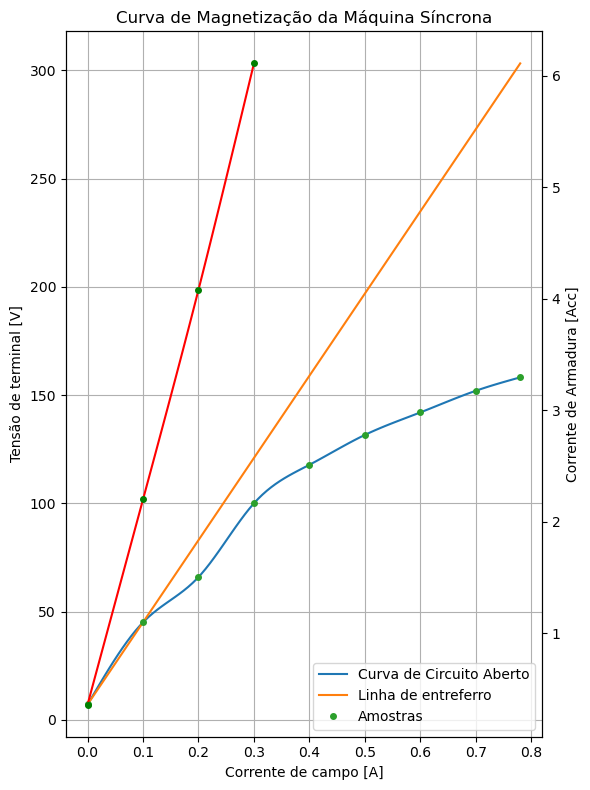

In [80]:
# Interpolação dos dados do ensaio de circuito aberto e ensaio de curto-circuito
curva_ca = CubicSpline(If_ca, Vt_ca, bc_type = 'natural')
curva_cc = CubicSpline(If_cc, Ia_cc, bc_type = 'natural')

# Interpolação com os dois primeiros pontos para extrair a característica linear
linha_entreferro = CubicSpline(If_ca[:2], Vt_ca[:2], bc_type = "natural")

# Intervalos para o gráfico
n_amostras = 100 # Número de pontos para o gráfico
CA = np.linspace(0, np.max(If_ca), n_amostras)
CC = np.linspace(0, np.max(If_cc), n_amostras)

# Configuração do gráfico
fig,ax1 = plt.subplots(figsize = (6,8))
ax1.set_title(r'Curva de Magnetização da Máquina Síncrona')
ax1.set_xlabel('Corrente de campo [A]')
ax1.set_ylabel('Tensão de terminal [V]')
ax1.grid(True)

# Traçando as curvas
ax1.plot(CA, curva_ca(CA), label = 'Curva de Circuito Aberto')
ax1.plot(CA, linha_entreferro(CA), label = 'Linha de entreferro')
ax1.plot(If_ca, Vt_ca, marker='o', linestyle='None', ms=4, label='Amostras')

ax2 = ax1.twinx()
ax2.set_ylabel('Corrente de Armadura [Acc]')
ax2.plot(CC, curva_cc(CC),color = 'red' ,label = 'Curva de Curto-Circuito')
ax2.plot(If_cc, Ia_cc, marker='o', color = 'green', linestyle='None', ms=4, label='Amostras')
ax2.tick_params(axis='y') 


fig.tight_layout()

ax1.legend(loc='lower right')